In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classification

In [11]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=3,n_informative=3,n_redundant=0,n_classes=2,random_state=999)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifer=KNeighborsClassifier(n_neighbors=5,algorithm='auto')

In [14]:
classifer.fit(x_train,y_train)
y_pred=classifer.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

Accuracty :0.8878787878787879
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       163
           1       0.85      0.94      0.89       167

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



<Axes: >

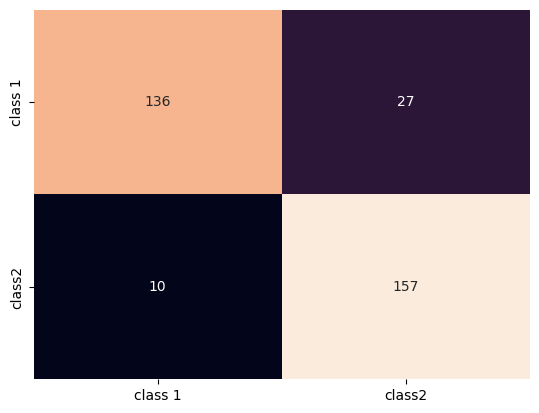

In [16]:
print(f"Accuracty :{acc}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['class 1','class2'],yticklabels=['class 1','class2'],cbar=False)

### Hyper parameter tuning using grid seach cv

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_neighbors':[3,4,5,6,7,8,9,10,15],
    'algorithm':['ball_tree', 'kd_tree', 'brute'],
    'p':[1,2]
}

In [21]:
model=KNeighborsClassifier()
gridCV=GridSearchCV(model,param_grid=param_grid,cv=5,verbose=3,refit=True)

In [22]:
gridCV.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, p=1;, score=0.888 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, p=1;, score=0.828 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, p=1;, score=0.881 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=3, p=1;, score=0.873 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=3, p=1;, score=0.896 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=3, p=2;, score=0.910 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=3, p=2;, score=0.843 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=3, p=2;, score=0.888 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=3, p=2;, score=0.866 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=3, p=2;, score=0.888 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=4, p=1;, score=0.910 total time=

,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['ball_tree', 'kd_tree', ...], 'n_neighbors': [3, 4, ...], 'p': [1, 2]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [23]:
gridCV.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2}

In [24]:
y_pred1=gridCV.predict(x_test)

In [25]:
acc=accuracy_score(y_test,y_pred1)
cm=confusion_matrix(y_test,y_pred1)
report=classification_report(y_test,y_pred1)

Accuracty :0.8939393939393939
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       163
           1       0.87      0.93      0.90       167

    accuracy                           0.89       330
   macro avg       0.90      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330



<Axes: >

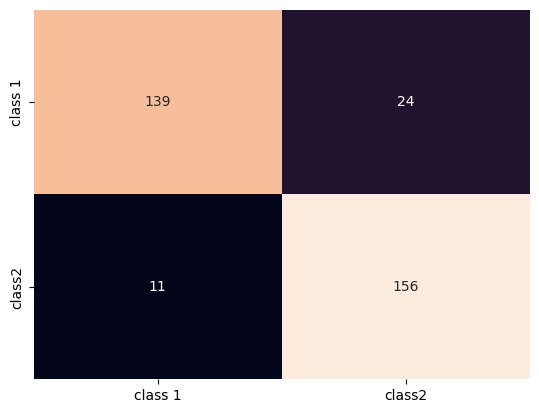

In [26]:
print(f"Accuracty :{acc}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['class 1','class2'],yticklabels=['class 1','class2'],cbar=False)

## Regression

In [28]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,noise=10,random_state=42)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', p=2, n_jobs=-1)

In [31]:
regressor.fit(x_train,y_train)
y_hat=regressor.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae,mse=mean_absolute_error(y_test,y_hat),mean_squared_error(y_test,y_hat)
r2=r2_score(y_test,y_hat)
print(f"MSE: {mse}\nMAE: {mae}\nR-square: {r2}")

MSE: 132.70133826064995
MAE: 9.269174435861805
R-square: 0.9155927746462499
